In [44]:
!pip install yahoo-fin
!pip install requests-html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
from matplotlib.legend import Legend
from yahoo_fin import stock_info as si

#### Strategies based on bollinger band
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import datetime as dt
today = dt.datetime.today().strftime('%Y-%m-%d') 
%matplotlib inline

In [46]:
def get_data(ticker, start_date, end_date):
    return pdr.get_data_yahoo(ticker, start_date, end_date)
SP500 = get_data('^GSPC', '2000-01-01', '2020-01-02')

def get_data2(ticker, start_date, end_date):
    return pdr.DataReader(ticker, 'yahoo', start_date, end_date)

In [ ]:
SP500.tail()

High          Low  ...      Volume    Adj Close
Date                                  ...                         
2019-12-26  3240.080078  3227.199951  ...  2160680000  3239.909912
2019-12-27  3247.929932  3234.370117  ...  2428670000  3240.020020
2019-12-30  3240.919922  3216.570068  ...  3013290000  3221.290039
2019-12-31  3231.719971  3212.030029  ...  2893810000  3230.780029
2020-01-02  3258.139893  3235.530029  ...  3458250000  3257.850098

[5 rows x 6 columns]

In [ ]:
### To get return on investment from the date of investment

def ROI(ticker, date, quantity):
    prev = get_data(ticker,  date, today)['Adj Close'][date]
    cur = get_data(ticker, date, today)['Adj Close'][today]
    return (cur - prev) * quantity


In [ ]:
ROI('WM','2020-01-02', 20 ) 

-23.727264404296875

In [ ]:
def compareVolatility(ticker):
    start = '2019'
    end = '2020'
    df_ticker = get_data(ticker,'2019-09-04', '2020-09-04')
    df_vix = get_data('^VIX','2019-09-04', '2020-09-04')
    sma1 = df_ticker['Volume'].rolling(window=21).mean()
    sma2 = df_vix['Adj Close'].rolling(window=21).mean()
    df_ticker['M avg'] = sma1
    df_vix['M avg'] = sma2
    plt.style.use('fivethirtyeight')
    fig = plt.figure(figsize=(12,6))
    ax = fig.subplots(1)
    x_axis1 = df_vix['2019':'2020'].index.get_level_values(0)
    x_axis2 = df_ticker['2019':'2020'].index.get_level_values(0)
    ax.set_ylabel(ticker+" Volume",color="red",fontsize=14)
# ax.yscale('log')
    ax2=ax.twinx()
    ax2.set_ylabel("VIX close",color="red",fontsize=14)
# ax.plot(x_axis, df_vix[start:end][col], color='blue', lw=2)
    ax.plot(x_axis1, df_ticker[start:end]['M avg'], label=ticker,color='green', lw=2)
# ax.plot(x_axis1, df_tsla[start:end]['M avg'], color='red', lw=2)
    ax2.plot(x_axis2, df_vix[start:end]['M avg'], label='VIX',color='blue', lw=2)
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')


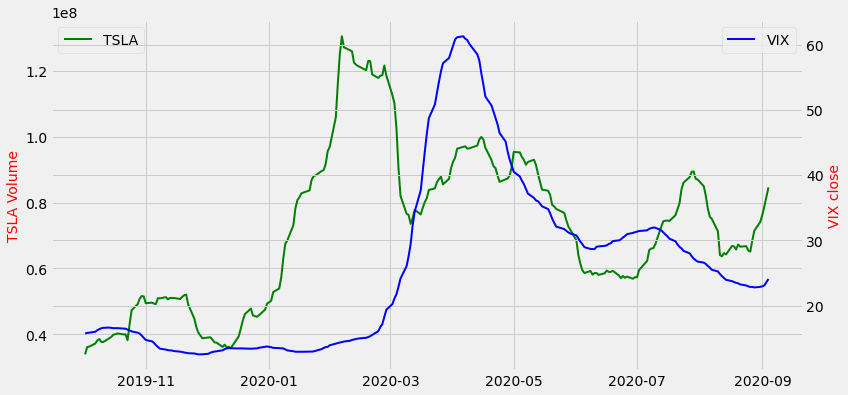

In [ ]:
compareVolatility('TSLA')

In [ ]:
####
# Generate a  list of tickers to pull from Yahoo Finance based on list of tickers.

# Stock comparison code
def get(tickers, startdate, enddate):
    def data(ticker):
        return (get_data(ticker, startdate, enddate))
    datas = map(data, tickers)
    return (pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))
               
tickers = ['AAPL', 'MSFT']
all_data = get(tickers, '2019-09-04', today)
print(all_data)

                         High         Low  ...       Volume   Adj Close
Ticker Date                                ...                         
AAPL   2019-09-04   52.369999   51.830002  ...   76752400.0   51.783714
       2019-09-05   53.492500   52.877499  ...   95654800.0   52.796162
       2019-09-06   53.605000   53.127499  ...   77449200.0   52.791210
       2019-09-09   54.110001   52.767502  ...  109237600.0   53.016479
       2019-09-10   54.195000   52.927502  ...  127111600.0   53.642761
...                       ...         ...  ...          ...         ...
MSFT   2020-08-31  228.699997  224.309998  ...   28774200.0  225.529999
       2020-09-01  227.449997  224.429993  ...   25791200.0  227.270004
       2020-09-02  232.860001  227.350006  ...   34080800.0  231.649994
       2020-09-03  229.309998  214.960007  ...   58148900.0  217.300003
       2020-09-04  218.300003  205.190002  ...   40449364.0  214.547501

[510 rows x 6 columns]


In [ ]:
adj_close = all_data[['Adj Close']].reset_index()
adj_close.head()
# Grabbing the ticker close from the end of last year
adj_close_start = adj_close[adj_close['Date']=='2019-09-04']

# Grab the latest stock close price
adj_close_latest = adj_close[adj_close['Date']==today]
adj_close_latest
adj_close_latest.set_index('Ticker', inplace=True)
adj_close_latest.head()
adj_close_start.head()

In [73]:
most_active = si.get_day_most_active()
sp500 = si.tickers_sp500()
dji = si.tickers_dow()
 
# get biggest gainers
big_gainz = si.get_day_gainers()
 
# get worst performers
losers = si.get_day_losers()

In [28]:
most_active.head()

Symbol  ... PE Ratio (TTM)
0   AAPL  ...          36.71
1    NIO  ...            NaN
2   TSLA  ...        1077.95
3    BAC  ...          12.81
4     GE  ...            NaN

[5 rows x 9 columns]

In [ ]:
big_gainz.head()

Symbol  ... PE Ratio (TTM)
0  BNKXF  ...           8.31
1  CRYYF  ...           7.87
2  PTKFF  ...            NaN
3  BNDSY  ...           6.59
4  TLVLF  ...          18.00

[5 rows x 9 columns]

In [ ]:
losers.head()

Symbol                            Name  ...    Market Cap  PE Ratio (TTM)
0  GWWTF  Growthpoint Properties Limited  ...  2.248000e+09             NaN
1  TWODF               Taylor Wimpey plc  ...  5.189000e+09            5.69
2  GFSZF                         G4S plc  ...  2.604000e+09           10.68
3   NVAX                   Novavax, Inc.  ...  5.641000e+09             NaN
4   NCNO                     nCino, Inc.  ...  6.989000e+09             NaN

[5 rows x 9 columns]

In [66]:
# get_data(['MSFT',"AAPL"],'2020-09-04','2020-09-04').sort_values(by=['Volume'], inplace=True, ascending=False)
table = get(['MSFT',"AAPL"],'2020-09-04','2020-09-04')

In [67]:
table.sort_values(by='Volume', ascending=False)['Volume']

Ticker  Date      
AAPL    2020-09-04    321983861
MSFT    2020-09-04     56783337
Name: Volume, dtype: int64

In [74]:
table = get(dji,'2020-09-03','2020-09-03')
table.sort_values(by='Volume', ascending=False)['Volume']

Ticker  Date      
AAPL    2020-09-03    254723200
MSFT    2020-09-03     58148900
INTC    2020-09-03     47278200
CSCO    2020-09-03     39231500
BA      2020-09-03     27704200
JPM     2020-09-03     23262100
VZ      2020-09-03     23120600
KO      2020-09-03     22282000
CVX     2020-09-03     16170300
WMT     2020-09-03     15973600
CRM     2020-09-03     13979200
MRK     2020-09-03     12386500
DIS     2020-09-03     12053700
V       2020-09-03     11305000
JNJ     2020-09-03      8669500
WBA     2020-09-03      8272200
PG      2020-09-03      7276100
NKE     2020-09-03      7259900
AXP     2020-09-03      6745500
DOW     2020-09-03      6725200
IBM     2020-09-03      5711000
HD      2020-09-03      5373500
CAT     2020-09-03      4477000
UNH     2020-09-03      3870800
GS      2020-09-03      3529100
HON     2020-09-03      3524500
MMM     2020-09-03      3479800
AMGN    2020-09-03      3136600
MCD     2020-09-03      3123700
TRV     2020-09-03      1298400
Name: Volume, dtype: 